In [1]:
# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import os
import librosa
import librosa.display
import glob 
#import skimage

from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder




In [2]:
df = pd.read_csv('UrbanSound8K\\metadata\\UrbanSound8K.csv')


df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


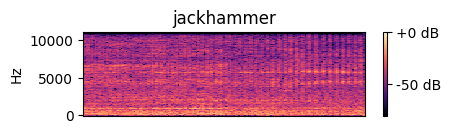

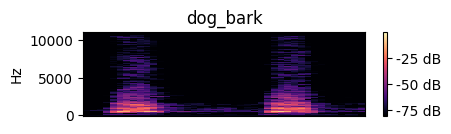

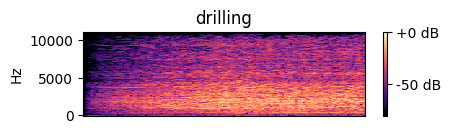

In [3]:
'''Using random samples to observe difference in waveforms.'''

arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = 'UrbanSound8K\\audio\\fold' + str(fold[i]) + '\\' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [94]:
dat1, sampling_rate1 = librosa.load('UrbanSound8K\\audio\\fold10\\100648-1-1-0.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 46)

In [3]:


# Define a fixed number of frames
desired_frames = 60

def parser(row):
    feature = []
    label = []
    
    for i in range(8732):
        file_name = 'UrbanSound8K\\audio\\fold' + str(df["fold"][i]) + '\\' + df["slice_file_name"][i]
        
        # Load audio file
        X, sample_rate = librosa.load(file_name)
        
        # Extract mel spectrogram
        mels = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        
        # If the number of frames is less than desired_frames, pad it
        if mels.shape[1] < desired_frames:
            pad_width = desired_frames - mels.shape[1]
            mels = np.pad(mels, pad_width=((0, 0), (0, pad_width)), mode='constant')
        # If the number of frames is more than desired_frames, trim it
        elif mels.shape[1] > desired_frames:
            mels = mels[:, :desired_frames]
        
        # Take the mean along the time axis
        mels_mean = np.mean(mels, axis=1)
        
        feature.append(mels_mean)
        label.append(df["classID"][i])
    
    # Convert lists to NumPy arrays
    feature = np.array(feature)
    label = np.array(label)
    
    return [feature, label]


In [4]:
temp = parser(df)

c:\Users\giorg\OneDrive\Υπολογιστής\DL Project\dlenv\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
c:\Users\giorg\OneDrive\Υπολογιστής\DL Project\dlenv\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\giorg\OneDrive\Υπολογιστής\DL Project\dlenv\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [5]:
X_ = temp[0]
Y = temp[1]

In [6]:
X=X_

In [7]:
Y = to_categorical(Y)

In [8]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)


In [10]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [11]:
input_dim = (16, 8, 1)

In [50]:
model = Sequential()

Feature extraction takes a lot of time i will do it later

In [51]:
# Model

model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

c:\Users\giorg\OneDrive\Υπολογιστής\DL Project\dlenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [59]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [60]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=5e-4,
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)

In [61]:
model.fit(X_train, Y_train, epochs = 90, batch_size = 50, validation_data = (X_test, Y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/90
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6204 - loss: 1.1392 - val_accuracy: 0.6436 - val_loss: 1.0996 - learning_rate: 0.0010
Epoch 2/90
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6610 - loss: 1.0118 - val_accuracy: 0.6619 - val_loss: 1.0366 - learning_rate: 0.0010
Epoch 3/90
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6626 - loss: 0.9701 - val_accuracy: 0.6821 - val_loss: 1.0090 - learning_rate: 0.0010
Epoch 4/90
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6944 - loss: 0.9109 - val_accuracy: 0.6853 - val_loss: 0.9963 - learning_rate: 0.0010
Epoch 5/90
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7010 - loss: 0.8789 - val_accuracy: 0.6885 - val_loss: 0.9671 - learning_rate: 0.0010
Epoch 6/90
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7261 - loss: 0.7869 - val_accuracy: 0.7142 - val_loss: 0.9503 - learning_rate: 0.0010
Epoch 7/90
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7428 - loss: 0.

In [62]:
encoder = LabelEncoder()

In [63]:
# Compute confusion matrix
predicted = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(Y_test, axis=1)
matrix = confusion_matrix(true, predicted)

# Plot confusion matrix
labels = [1,2,3,4,5,6,7,8,9,10]

fig = ff.create_annotated_heatmap(z=matrix, x=labels, y=labels, colorscale='Viridis')
fig.update_layout(
                  xaxis=dict(title='Predicted Class'),
                  yaxis=dict(title='True Class'),
                  font=dict(size=12),
                  width=1000,
                  height=500)
fig.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
